In [72]:
import os

from adf.calc_adf import calc_adf, convert_txt_to_csv
from utils.constants.constants import Constants
from utils.mkdir import mkdir_structure_dir
import glob

structures = Constants.structures()

In [78]:
# adf 計算する
txt_dir = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/txt'
path_to_output = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv'
# calc_adf(path_to_output=path_to_output, cutoff=3)
cutoff_list = [1.8]
for cutoff in cutoff_list:
    _txt_dir = f'{txt_dir}/cut_{cutoff}'
    os.mkdir(_txt_dir)
    mkdir_structure_dir(_txt_dir)
    calc_adf(path_to_output=_txt_dir, cutoff=cutoff)

    _csv_dir = f'{path_to_output}/cut_{cutoff}'
    os.mkdir(_csv_dir)
    mkdir_structure_dir(_csv_dir)
    for structure in structures:
        files = glob.glob(f'{_txt_dir}/{structure}/*.txt')
        for txt_file in files:
            structure_idx = txt_file.split()
            convert_txt_to_csv(txt_file,
                               path_to_output=f'{_csv_dir}/{structure}',
                               structure=structure,
                               structure_idx= txt_file.split('/')[-1].split('.')[0].split('_')[-1]
                               )

In [27]:
# concat each cutoff adf
import pandas as pd
import numpy as np

def get_idx(path):
    return path.split('/')[-1].split('.')[0].split('_')[-1]

def concat_all_csv(csv_dir):
    structures = Constants.structures()
    csv_path = []
    for structure in structures:
        files = glob.glob(f'{csv_dir}/{structure}/*.csv')
        for file in files:
            csv_path.append(file)
    df = pd.read_csv(csv_path[0])
    idx = get_idx(csv_path[0])
    df.rename(columns={'Unnamed: 0':'bond'}, inplace=True)
    df.insert(0, 'idx', idx)
    for path in csv_path[1:]:
        tmp_df = pd.read_csv(path)
        idx = get_idx(path)
        tmp_df.rename(columns={'Unnamed: 0':'bond'}, inplace=True)
        tmp_df.insert(0, 'idx', idx)
        df = pd.concat([df, tmp_df])
    df.to_csv(f'{csv_dir}/all.csv', index=False)

In [80]:
dir_list = [
    '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv/cut_1.8'
]
for _dir in dir_list:
    concat_all_csv(_dir)

In [64]:
# calc adf diff
def calc_diff(cutoff1,cutoff2):
    df1 = pd.read_csv(f'/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv/cut_{cutoff1}/all.csv')
    df2 = pd.read_csv(f'/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv/cut_{cutoff2}/all.csv')
    df1 = df1.sort_values(['structure','idx','bond'])
    df2 = df2.sort_values(['structure','idx','bond'])
    key_columns = df1.iloc[:,0:3]
    diff_columns = df2.iloc[:,3:] - df1.iloc[:,3:]
    df = pd.concat([key_columns,diff_columns],axis=1)
    return df

In [69]:
import matplotlib.pyplot as plt

def plot_adf(df, ax, title):
    x = np.linspace(0.5,179.5,180)
    mean = df.mean()[1:]
    std = df.std()[1:]
    ymax = (mean+std).max()
    ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
    ax.set_title(f'{bond}: bond angle distribution {title}')
    ax.set_xlabel('Angle(deg)')
    ax.set_ylabel('count')
    ax.set_ylim(0,ymax+10)
    ax.plot(x, mean)
    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')

# fig.savefig(f'{save_dir}/{bond}.png')

In [ ]:
# plot difference between adf of each cutoff but now no need to use
import os

bonds = [
    'O-O-O',
    'O-O-Si',
    'Si-O-Si',
    'O-Si-O',
    'O-Si-Si',
    'Si-Si-Si',
]
cutoff_list = [
    [3,4],
    [4,5],
    [5,6],
    [6,7],
    [7,8],
    [8,9],
    [9,10]
]
root_dir = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/pic'
for cutoff in cutoff_list:
    save_dir = f'{root_dir}/{cutoff[0]}-{cutoff[1]}'
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    df = calc_diff(cutoff[0], cutoff[1])
    for bond in bonds:
        tmp_df = df.copy()
        tmp_df = tmp_df[tmp_df.bond == bond]
        fig, ax = plt.subplots()
        plot_adf(tmp_df, ax, title=f'cutoff: {cutoff[0]}-{cutoff[1]}')
        fig.savefig(f'{save_dir}/{bond}.png')

<ipython-input-69-e799b51732e2>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()[1:]
<ipython-input-69-e799b51732e2>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()[1:]
<ipython-input-69-e799b51732e2>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()[1:]
<ipython-input-69-e799b51732e2>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeE

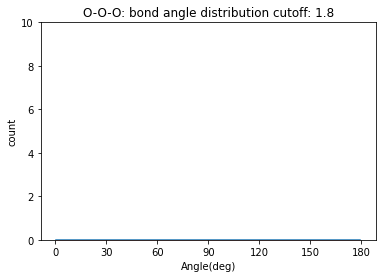

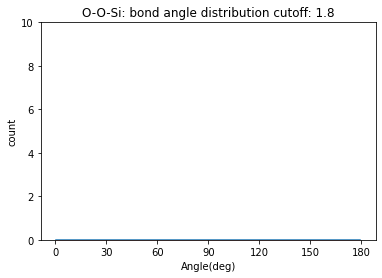

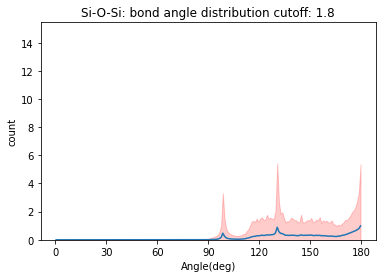

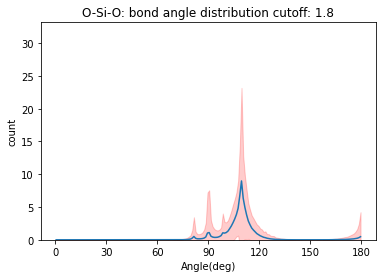

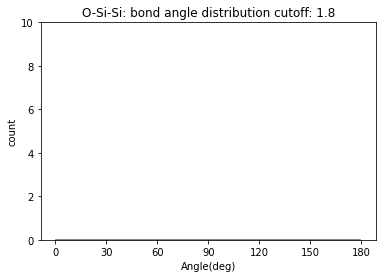

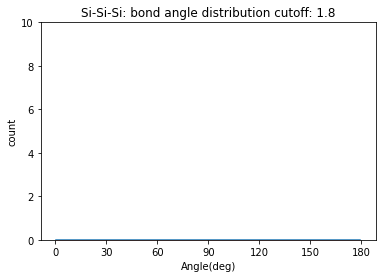

In [81]:
bonds = [
    'O-O-O',
    'O-O-Si',
    'Si-O-Si',
    'O-Si-O',
    'O-Si-Si',
    'Si-Si-Si',
]
# cutoff_list = [1.5, 2.7, 3.1, 4.8, 5.2]
cutoff_list = [1.8]
root_dir = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/pic'
for cutoff in cutoff_list:
    save_dir = f'{root_dir}/{cutoff}'
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    df = pd.read_csv(f'/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv/cut_{cutoff}/all.csv')
    for bond in bonds:
        tmp_df = df.copy()
        tmp_df = tmp_df[tmp_df.bond == bond]
        fig, ax = plt.subplots()
        plot_adf(tmp_df, ax, title=f'cutoff: {cutoff}')
        fig.savefig(f'{save_dir}/{bond}.png')